In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [3]:
import numpy as np

# import algorithm
from creditcard_preparation import prepare_creditcard_data, combine_algo_and_pipeline, load_creditcard_data

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# X_train, X_dev, X_test, y_train, y_dev, y_test = prepare_creditcard_data((1/10,1/10))

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
from creditcard_preparation import prepare_creditcard_data, combine_algo_and_pipeline, load_creditcard_data


In [5]:
random_state = 123
df = load_creditcard_data()
features = [col for col in df.columns if col not in ['id', 'Class']]

In [28]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [29]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
random_state = 123
features = [col for col in df.columns if col not in ['id', 'Class']]
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.2, random_state=random_state, stratify=df['Class'], shuffle=True)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
def show_model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def plot_history(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` 
        # is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined 
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further 
        # defined as "for at least 2 epochs"
        patience=200,
        verbose=1,
    )
]

# This is with low amount of Neurons (Don't change anything here)

In [9]:
def create_deep_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model 

# Example 1

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9325 - loss: 0.1846 - val_accuracy: 0.9892 - val_loss: 0.0321
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9903 - loss: 0.0287 - val_accuracy: 0.9967 - val_loss: 0.0132
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9957 - loss: 0.0151 - val_accuracy: 0.9974 - val_loss: 0.0096
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0072 - val_accuracy: 0.9984 - val_loss: 0.0067
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.

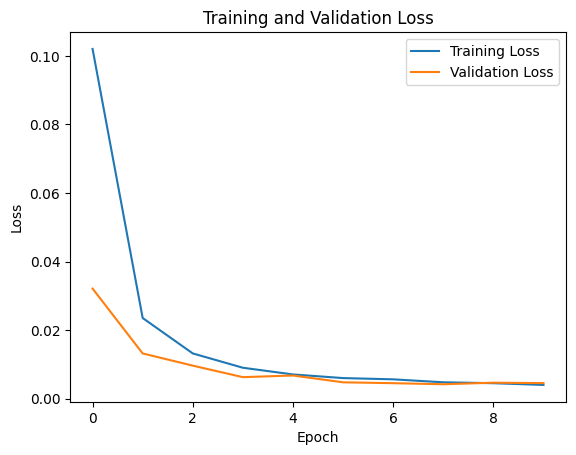

In [12]:
start_time = time.time()
deep_nn_model3 = create_deep_nnmodel(len(features))
history = deep_nn_model3.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 502us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



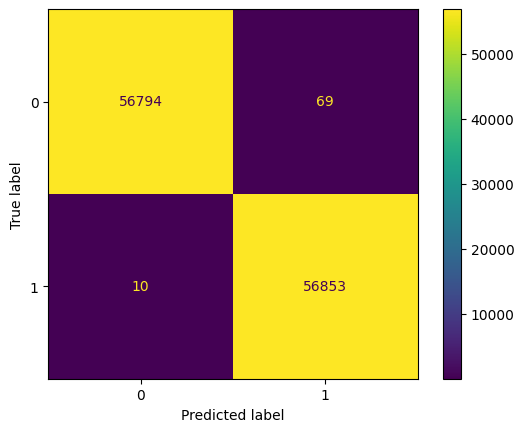

In [13]:
show_model_results(deep_nn_model3)


# Example 2

Epoch 1/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9289 - loss: 0.1927 - val_accuracy: 0.9898 - val_loss: 0.0310
Epoch 2/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9951 - val_loss: 0.0170
Epoch 3/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9976 - val_loss: 0.0098
Epoch 4/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9975 - loss: 0.0100 - val_accuracy: 0.9982 - val_loss: 0.0073
Epoch 5/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 6/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9987 - val_loss: 0.0060
Epoch 7/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9990 - val_loss: 0.0047
Epoch 8/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accu

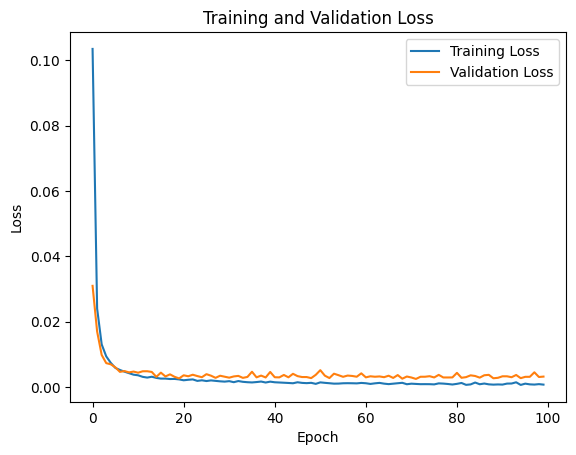

In [62]:
start_time = time.time()
deep_nn_model = create_deep_nnmodel(len(features))
history = deep_nn_model.fit(X_train, y_train, epochs=100, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

In [63]:
print(y_train[:5])


128736    1
129834    0
89837     0
46497     1
15597     1
Name: Class, dtype: int64


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 1s 238us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



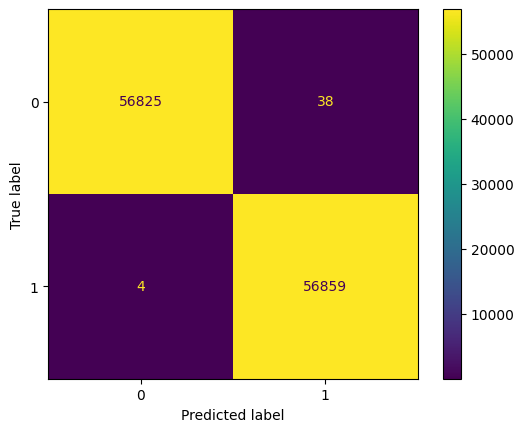

In [64]:
show_model_results(deep_nn_model)


In [61]:
deep_nn_model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 29)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,247 (63.47 KB)

 Trainable params: 5,415 (21.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,832 (42.32 KB)

# Sample for Mateus to work with. (Don't remove this keep adding more parts like this)

In [70]:
num_neurons = 200000 #Change this value for every rep
deep_nn_model2 = create_deep_nnmodel(num_neurons)   # make sure to change the deep nn variable name for each rep

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1114s 2s/step - accuracy: 0.9648 - loss: 0.0917 - val_accuracy: 0.9959 - val_loss: 0.0165
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 301s 423ms/step - accuracy: 0.9974 - loss: 0.0114 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 444s 624ms/step - accuracy: 0.9984 - loss: 0.0077 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 295s 415ms/step - accuracy: 0.9985 - loss: 0.0084 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 305s 429ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.9977 - val_loss: 0.0081
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 302s 425ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 306s 430ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9976 - val_loss: 0.0080
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 312s 438ms/step - accuracy: 0.9992 - l

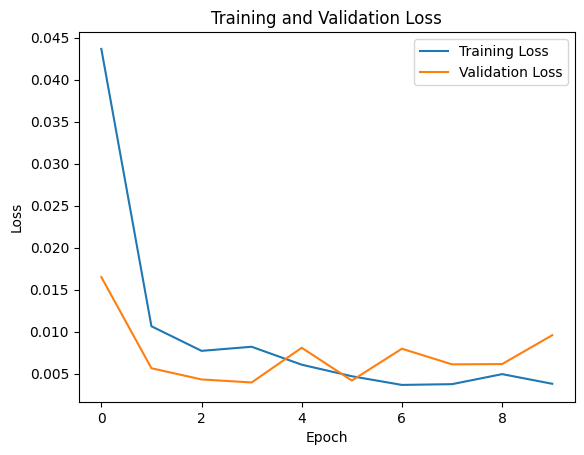

In [71]:
start_time = time.time()
history = deep_nn_model2.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



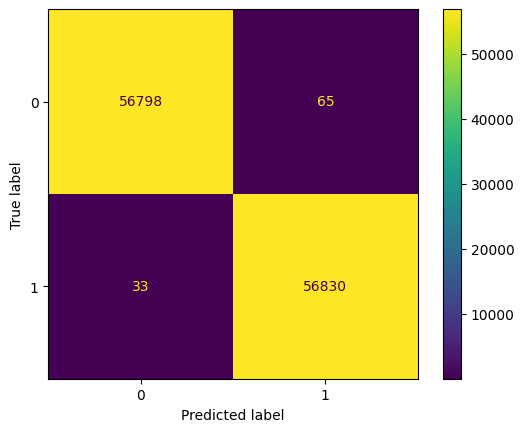

In [72]:
show_model_results(deep_nn_model2)

In [78]:
deep_nn_model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 200000)         │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │    12,800,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,408,069 (215.18 MB)

 Trainable params: 18,802,689 (71.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,605,380 (143.45 MB)

Testing num of neurons

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 567s 795ms/step - accuracy: 0.9591 - loss: 0.1058 - val_accuracy: 0.9973 - val_loss: 0.0301
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 574s 807ms/step - accuracy: 0.9972 - loss: 0.0148 - val_accuracy: 0.9981 - val_loss: 0.0123
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 724s 1s/step - accuracy: 0.9986 - loss: 0.0089 - val_accuracy: 0.9979 - val_loss: 0.0141
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 576s 810ms/step - accuracy: 0.9984 - loss: 0.0103 - val_accuracy: 0.9979 - val_loss: 0.0062
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 576s 810ms/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 575s 808ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 574s 807ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1231s 2s/step - accuracy: 0.9991 - loss

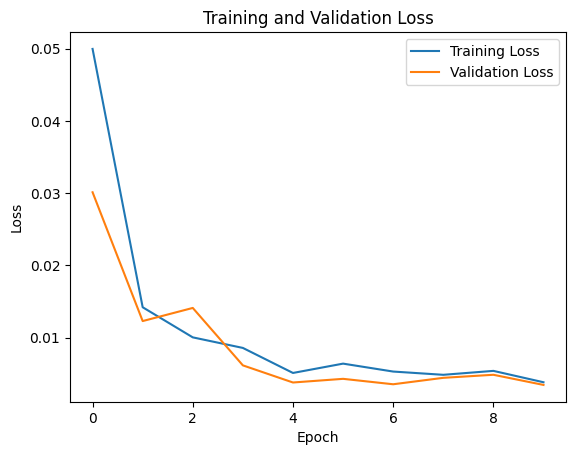

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 130s 36ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



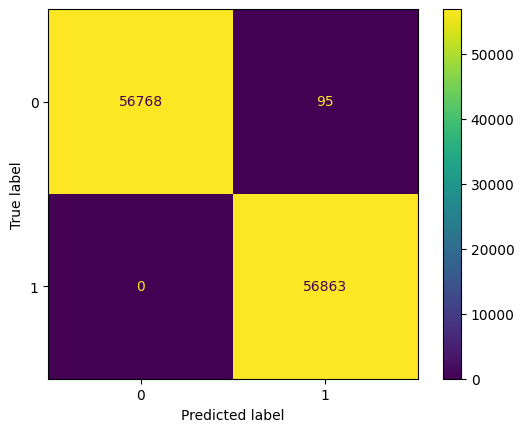

In [15]:
num_neurons = 500000 #Change this value for every rep
deep_nn_model5 = create_deep_nnmodel(num_neurons)   # make sure to change the deep nn variable name for each rep
start_time = time.time()
history = deep_nn_model5.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)
show_model_results(deep_nn_model5)

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 705s 989ms/step - accuracy: 0.9507 - loss: 0.1168 - val_accuracy: 0.9976 - val_loss: 0.0109
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.9967 - loss: 0.0149 - val_accuracy: 0.9978 - val_loss: 0.0112
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.9980 - loss: 0.0113 - val_accuracy: 0.9972 - val_loss: 0.0115
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 709s 997ms/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.9984 - val_loss: 0.0071
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 17318s 24s/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9988 - val_loss: 0.0067
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 4447s 6s/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9983 - val_loss: 0.0065
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 683s 960ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1198s 2s/step - accuracy: 0.9989 - loss: 0.0

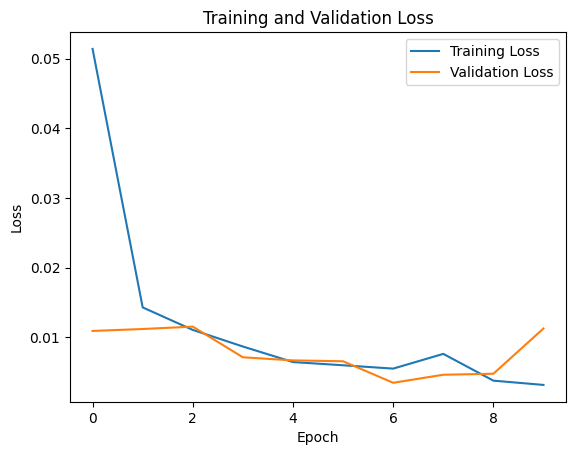

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 178s 50ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.99      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



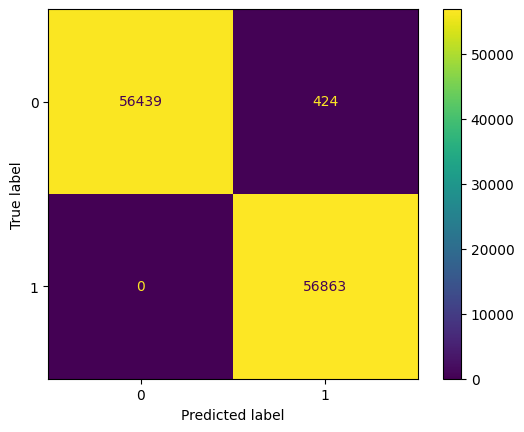

In [10]:
num_neurons = 600000 #Change this value for every rep
deep_nn_model6 = create_deep_nnmodel(num_neurons)   # make sure to change the deep nn variable name for each rep
start_time = time.time()
history = deep_nn_model6.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)
show_model_results(deep_nn_model6)

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.9689 - loss: 0.0895 - val_accuracy: 0.9934 - val_loss: 0.0285
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.9968 - loss: 0.0131 - val_accuracy: 0.9979 - val_loss: 0.0087
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.9980 - loss: 0.0094 - val_accuracy: 0.9984 - val_loss: 0.0081
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 789s 1s/step - accuracy: 0.9984 - loss: 0.0083 - val_accuracy: 0.9989 - val_loss: 0.0051
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9978 - val_loss: 0.0072
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 787s 1s/step - accuracy: 0.9982 - loss: 0.0077 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 789s 1s/step - accuracy: 0.9990 - loss: 0.0039 - val_accu

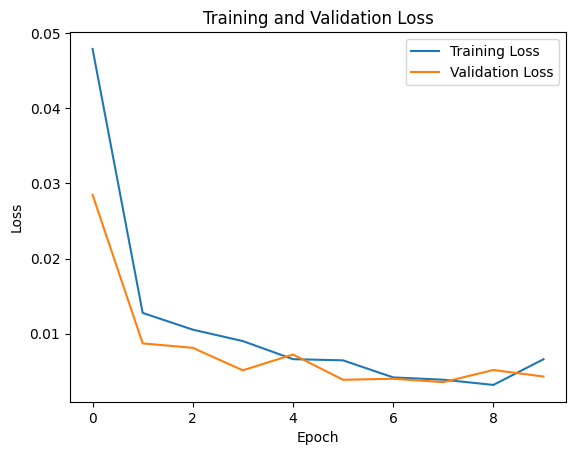

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 150s 42ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



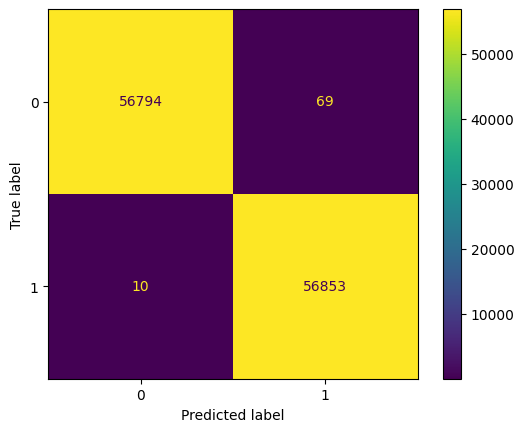

In [10]:
num_neurons = 700000 #Change this value for every rep
deep_nn_model7 = create_deep_nnmodel(num_neurons)   # make sure to change the deep nn variable name for each rep
start_time = time.time()
history = deep_nn_model7.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)
show_model_results(deep_nn_model7)

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.9677 - loss: 0.0971 - val_accuracy: 0.9974 - val_loss: 0.0195
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 913s 1s/step - accuracy: 0.9966 - loss: 0.0166 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.9979 - loss: 0.0119 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.9982 - loss: 0.0113 - val_accuracy: 0.9985 - val_loss: 0.0061
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.9983 - loss: 0.0091 - val_accuracy: 0.9988 - val_loss: 0.0179
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 916s 1s/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9982 - val_loss: 0.0076
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 914s 1s/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9991 - val_loss: 0.0072
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.9992 - loss: 0.0042 - val_accu

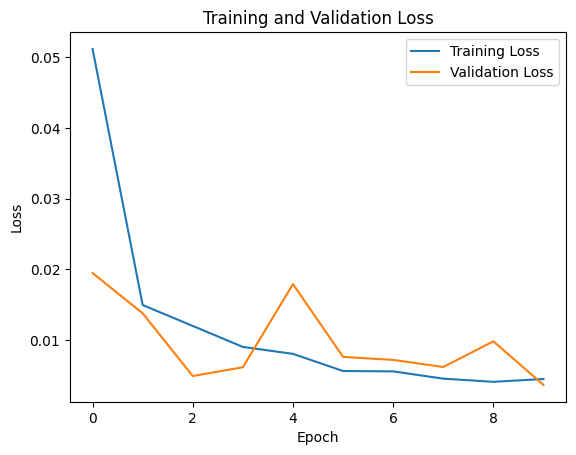

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 172s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



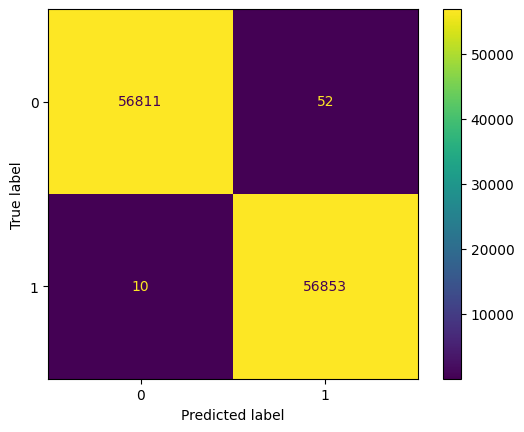

In [11]:
num_neurons = 800000 #Change this value for every rep
deep_nn_model8 = create_deep_nnmodel(num_neurons)   # make sure to change the deep nn variable name for each rep
start_time = time.time()
history = deep_nn_model8.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)
show_model_results(deep_nn_model8)